In [1]:
import simplejson as json
import pandas as pd
import numpy as np
import re
import simplejson as json

def process_or_store(tweet):
    print(json.dumps(tweet))


In [2]:


#with open(filename, 'r') as f:
#    for i in range(1):
#        line = f.readline() # read only the first tweet/line
#        tweet = json.loads(line) # load it as Python dict
#        print(json.dumps(tweet, indent=4)) # pretty-print
        
        

In [3]:
path="./data/altcoin-tweets/neo/"
filename="tweets_neo-2016-07-09now0.json"
df=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2016-07-09now1.json"
df2=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2016-07-09now2.json"
df3=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2017-09-01now0.json"
df4=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2017-09-01now1.json"
df5=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2018-01-01now0.json"
df6=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2018-01-01now1.json"
df7=pd.read_json(path_or_buf=path+filename)
filename="tweets_neo-2018-01-01now2.json"
df8=pd.read_json(path_or_buf=path+filename)



print(df['id'].count())

frames = [df,df2,df3,df4,df5,df6,df7,df8]
df=pd.concat(frames)
print(df['id'].count())
df=df.drop_duplicates('id')
print(df['id'].count())
df.head()


47507
506565
118681


,fullname,id,likes,replies,retweets,text,timestamp,url,user
0,Airdrop Hunter,961751371128147968,2,0,3,Get free tokens for the hottest new cryptocurr...,2018-02-08 23:59:30,/chn2z/status/961751371128147969,chn2z
1,Chart Davidson - Crypto Ninja,961750426797379584,2,2,0,Stellar is starting to get volume. On Watch!\n...,2018-02-08 23:55:44,/ChartDavidson/status/961750426797379584,ChartDavidson
2,Riyd Bensalem,961749542894014464,11,3,1,the winners of the 10000 DigiByte will be chos...,2018-02-08 23:52:14,/Riyadpitchi/status/961749542894014464,Riyadpitchi
3,Scrembo,961748893087272960,5,9,1,ICO Millionaire | Possible Top ICOs For 2018 S...,2018-02-08 23:49:39,/scrembo88/status/961748893087272965,scrembo88
4,New Crypto Alert,961748078549176320,1,3,0,"http://cmun.it/g7a3zo \n#NEO, #EOS, #LTC, #NEM...",2018-02-08 23:46:24,/NewCryptoAlert/status/961748078549176322,NewCryptoAlert


In [4]:
#pd.to_numeric()
t=pd.to_datetime('2016-07-09 22:00:00')
s=pd.Series([t])
ti=pd.to_numeric(s)
ti
#list=[t]
#ti=pd.to_numeric(list)
#ti

0    1468101600000000000
dtype: int64

In [5]:

df['tstamp']=pd.to_datetime(df["timestamp"])
df['t_int']=pd.to_numeric(df['tstamp'])
df=df.sort_values('t_int')
df=df[df['t_int']>1468101600000000000]

df['score']=(1+df['likes']*1+df['replies']*1+df['retweets']*1)*1
#df['Tweet Cumulative']=df['score'].cumsum()
df['count']=1
df['# Tweets Cumulative']=df['count'].cumsum()
df['Likes, Replies, Retweets']=df['score']*1


/Users/tothmiklos/develop/venv-python35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


<IPython.core.display.Javascript object>


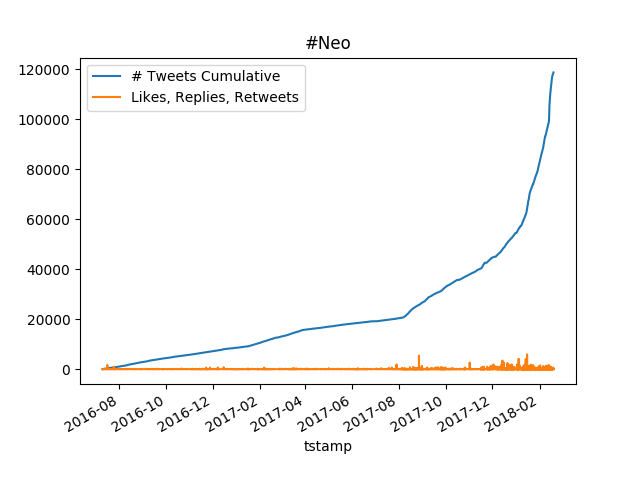

Text(0.5,1,'#Neo')

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt

df.plot(x='tstamp',y=['# Tweets Cumulative','Likes, Replies, Retweets'])
plt.title('#Neo')


In [6]:

len(df[df['retweets']>0])


27457

In [244]:
import nltk
from nltk.probability import FreqDist

#nltk.download('punkt')

#df=pd.read_json(path_or_buf=filename)
#nltk.word_tokenize('The quick Brown fox jumps over the lazy dog.')
df['tokenize']=df['text'].map(nltk.word_tokenize)

df['tstamp']=pd.to_datetime(df["timestamp"])
df.head()

,fullname,id,likes,replies,retweets,text,timestamp,url,user,tokenize,tstamp
0,JUNΞ,860520693569511424,2,0,1,"Always biggest question is ""how we can pay in ...",2017-05-05 15:44:55,/JUN_Omise/status/860520693569511425,JUN_Omise,"[Always, biggest, question, is, ``, how, we, c...",2017-05-05 15:44:55
1,Big,860504239956557824,0,0,0,#OmiseGo is coming T_T,2017-05-05 14:39:32,/bigdevs/status/860504239956557825,bigdevs,"[#, OmiseGo, is, coming, T_T]",2017-05-05 14:39:32
2,JUNΞ,859991740282945536,134,7,65,Having meeting for @omise_go with #ethereum fo...,2017-05-04 04:43:03,/JUN_Omise/status/859991740282945537,JUN_Omise,"[Having, meeting, for, @, omise_go, with, #, e...",2017-05-04 04:43:03
3,JUNΞ,859097560492855296,1,0,0,Time has come ! #ETHEREUM #omisego #ico #omise...,2017-05-01 17:29:54,/JUN_Omise/status/859097560492855296,JUN_Omise,"[Time, has, come, !, #, ETHEREUM, #, omisego, ...",2017-05-01 17:29:54
4,JUNΞ,857628309810667520,0,1,1,Anyone interest if #OmiseGo doing #announce #e...,2017-04-27 16:11:37,/JUN_Omise/status/857628309810667521,JUN_Omise,"[Anyone, interest, if, #, OmiseGo, doing, #, a...",2017-04-27 16:11:37


In [249]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print("len(df)",len(df))

#dfsent=df[df['retweets']>0]
dfsent=df.copy()

print("len(dfsent)",len(dfsent))

#text="We are trying to cooperating with several different exchange but additionally any exchange interested working with #OmiseGO ? #OMG #ICO	"
#print(sid.polarity_scores(text))

dfsent['sent_pos']=dfsent['text'].map(lambda x: sid.polarity_scores(x)['pos'])
dfsent['sent_neg']=dfsent['text'].map(lambda x: sid.polarity_scores(x)['neg'])
dfsent['sent_neu']=dfsent['text'].map(lambda x: sid.polarity_scores(x)['neu'])
dfsent['sent_compound']=dfsent['text'].map(lambda x: sid.polarity_scores(x)['compound'])



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tothmiklos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
len(df) 15918
len(dfsent) 15918


In [261]:
pd.set_option('max_colwidth',150)
print((dfsent[dfsent["sent_neg"]-0.2>dfsent['sent_pos']]['text']))

0                                                     Always biggest question is "how we can pay in / out with out pain" .  #omisego #payment #omise #ETHEREUM
53                So many damn #scammer try to steal peoples BTC / ETH. \n*Do not trust any 3rd party information unless verifying it with us first!* #omisego
87                                                                                                                             This link is SCAM #OmiseGO #ICO
88                                                                              I'm Founder  of @omise / @omise_go .\n@omise__go is SCAM. #omise #omiseGO #ico
91                               THIS IS SCAM !!! http://omise-go.com \n\nDO NOT SEND ANY ETH!!\nWe are only using #BitcoinSuisse and #ICOAGE !! #OmiseGO #ICO
176                                                                                        $OMG #OmiseGO is on fire, is that the Air Drop effect fueling this?
203                                           

In [7]:
import simplejson as json
import tweepy
from tweepy import OAuthHandler
 
consumer_key = 'r0vHGL20VO5YfXLhCoHimm4o5'
consumer_secret = '7VuzoBLEFZATkrYXj13fVZ53jnjcfT4cfL7SlHD6gF64udqRTN'
access_token = '3301731023-SExGOkbxz0emgWdmgI2QqPoEGsIfP2yCc00SSmp'
access_secret = 'vtbP2P3yyNQlz4IWIaDPVVs76XGr0wjkvWv2uKkmYoWms'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)



#results = api.retweets(907438213131841536)
#results = api.retweets(921051725045252096)



In [16]:


#orig_tweet = api.get_status(953244229005971456)
#print(orig_tweet)
len(df[df['retweets']==5])
#df[df['id']=='773898659465420800']



query = 'retweets_of:773898659465420800'
max_tweets = 500
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]



In [21]:

print(searched_tweets)
results = api.retweets(773898659465420800)
for retweet in results:    
    retweet_created_at=retweet.created_at
    retweeter_followers=retweet.user.followers_count
    print(retweet_created_at)
    print(retweeter_followers)
    

[]
2016-09-08 21:19:21
116
2016-09-08 18:09:19
138
2016-09-08 15:26:08
66
2016-09-08 15:01:53
932


In [101]:
import time


counter = 0
def collect_retweets(dft, orig_tweet_id):
    try:
        global counter
        counter+=1
        print(counter,"Getting retweets trough API orig tweet id: ",orig_tweet_id)
        results = api.retweets(orig_tweet_id)
        for retweet in results:    
            retweet_created_at=retweet.created_at
            retweeter_followers=retweet.user.followers_count
            #dft=dft.append({'orig_tweet_id': orig_tweet_id,'retweet_id': retweet}, ignore_index=True)
            dft.loc[retweet.id] = [orig_tweet_id,retweet.id,retweeter_followers,retweet_created_at]
            #print(tweet.id)
            #print(json.dumps(tweet._json, indent=3))
            #print(" ")
    except Exception as e:
         print(e)
    
    waiting=13
    print("waiting sec:",waiting)
    time.sleep(waiting)

    return orig_tweet_id


#
dft=pd.DataFrame(columns=list(['orig_tweet_id','retweet_id','retweeter_followers','retweet_created_at']))
#collect_retweets(dft,953244229005971456)
dfsent['id'].map(lambda x: collect_retweets(dft,x))
dft.to_csv('./data/altcoin-tweets/retweets_omnisego_full-new.csv')

#print(json.dumps(json_str, indent=4)) 

#results
#tweet = json.loads(str(results)) # load it as Python dict
#print(json.dumps(tweet, indent=3)) # pretty-print
#print(results)

1 Getting retweets trough API orig tweet id:  881464674360754176
waiting sec: 13
2 Getting retweets trough API orig tweet id:  881802046210535424
waiting sec: 13
3 Getting retweets trough API orig tweet id:  881803975057485824
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
4 Getting retweets trough API orig tweet id:  881849469414678528
waiting sec: 13
5 Getting retweets trough API orig tweet id:  882831874376310784
waiting sec: 13
6 Getting retweets trough API orig tweet id:  882863059319922688
waiting sec: 13
7 Getting retweets trough API orig tweet id:  883203850504687616
waiting sec: 13
8 Getting retweets trough API orig tweet id:  883661695406587904
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
9 Getting retweets trough API orig tweet id:  883662879693479936
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
10 Getting retweets trough API orig tweet id:  883663529106063360
[{'code': 34, 'mess

80 Getting retweets trough API orig tweet id:  893637474521579520
waiting sec: 13
81 Getting retweets trough API orig tweet id:  893638064261570560
waiting sec: 13
82 Getting retweets trough API orig tweet id:  893700780238159872
waiting sec: 13
83 Getting retweets trough API orig tweet id:  893753910996770816
waiting sec: 13
84 Getting retweets trough API orig tweet id:  893840742824554496
waiting sec: 13
85 Getting retweets trough API orig tweet id:  893902006406062080
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
86 Getting retweets trough API orig tweet id:  893969679328215040
waiting sec: 13
87 Getting retweets trough API orig tweet id:  893977216723410944
waiting sec: 13
88 Getting retweets trough API orig tweet id:  894058507200118784
waiting sec: 13
89 Getting retweets trough API orig tweet id:  894305395560259584
waiting sec: 13
90 Getting retweets trough API orig tweet id:  894524120234250240
waiting sec: 13
91 Getting retweets trough API orig 

waiting sec: 13
164 Getting retweets trough API orig tweet id:  896760445113126912
waiting sec: 13
165 Getting retweets trough API orig tweet id:  896787309944877056
waiting sec: 13
166 Getting retweets trough API orig tweet id:  896787790951727104
waiting sec: 13
167 Getting retweets trough API orig tweet id:  896788919861235712
waiting sec: 13
168 Getting retweets trough API orig tweet id:  896913683141603328
waiting sec: 13
169 Getting retweets trough API orig tweet id:  896917034155560960
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
170 Getting retweets trough API orig tweet id:  896946459718762496
waiting sec: 13
171 Getting retweets trough API orig tweet id:  897000161376964608
waiting sec: 13
172 Getting retweets trough API orig tweet id:  897003999403982848
waiting sec: 13
173 Getting retweets trough API orig tweet id:  897010373534126080
waiting sec: 13
174 Getting retweets trough API orig tweet id:  897090353500626944
[{'code': 34, 'message': 

waiting sec: 13
248 Getting retweets trough API orig tweet id:  899162130611544064
waiting sec: 13
249 Getting retweets trough API orig tweet id:  899193871191519232
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
250 Getting retweets trough API orig tweet id:  899263044718665728
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
251 Getting retweets trough API orig tweet id:  899295850576224256
waiting sec: 13
252 Getting retweets trough API orig tweet id:  899307651133313024
waiting sec: 13
253 Getting retweets trough API orig tweet id:  899325491576016896
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
254 Getting retweets trough API orig tweet id:  899325846896476160
waiting sec: 13
255 Getting retweets trough API orig tweet id:  899343273818566656
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
256 Getting retweets trough API orig tweet id:  899351224952119296
[{'co

331 Getting retweets trough API orig tweet id:  901378169399386112
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
332 Getting retweets trough API orig tweet id:  901393710822412288
waiting sec: 13
333 Getting retweets trough API orig tweet id:  901395107823353856
waiting sec: 13
334 Getting retweets trough API orig tweet id:  901395290367959040
waiting sec: 13
335 Getting retweets trough API orig tweet id:  901395631104819200
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
336 Getting retweets trough API orig tweet id:  901395882029064192
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
337 Getting retweets trough API orig tweet id:  901430752956604416
waiting sec: 13
338 Getting retweets trough API orig tweet id:  901454438199685120
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
339 Getting retweets trough API orig tweet id:  901459579686486016
waiting sec: 13
340 G

waiting sec: 13
412 Getting retweets trough API orig tweet id:  904759783324078080
waiting sec: 13
413 Getting retweets trough API orig tweet id:  904763855598886912
waiting sec: 13
414 Getting retweets trough API orig tweet id:  904771847962669056
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
415 Getting retweets trough API orig tweet id:  904774946374770688
waiting sec: 13
416 Getting retweets trough API orig tweet id:  904776408794267648
waiting sec: 13
417 Getting retweets trough API orig tweet id:  904781194751029248
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
418 Getting retweets trough API orig tweet id:  904784116125765632
waiting sec: 13
419 Getting retweets trough API orig tweet id:  904789131460575232
waiting sec: 13
420 Getting retweets trough API orig tweet id:  904790026768277504
waiting sec: 13
421 Getting retweets trough API orig tweet id:  904805179597484032
[{'code': 34, 'message': 'Sorry, that page doe

waiting sec: 13
493 Getting retweets trough API orig tweet id:  905259340600229888
waiting sec: 13
494 Getting retweets trough API orig tweet id:  905264552627056640
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
495 Getting retweets trough API orig tweet id:  905268254230249472
waiting sec: 13
496 Getting retweets trough API orig tweet id:  905273142029029376
waiting sec: 13
497 Getting retweets trough API orig tweet id:  905288307202019328
waiting sec: 13
498 Getting retweets trough API orig tweet id:  905303360068362240
waiting sec: 13
499 Getting retweets trough API orig tweet id:  905319594922876928
waiting sec: 13
500 Getting retweets trough API orig tweet id:  905321229153906688
waiting sec: 13
501 Getting retweets trough API orig tweet id:  905323748005486592
[{'code': 200, 'message': 'Forbidden.'}]
waiting sec: 13
502 Getting retweets trough API orig tweet id:  905326080655065088
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiti

573 Getting retweets trough API orig tweet id:  905796108286341120
waiting sec: 13
574 Getting retweets trough API orig tweet id:  905798984387751936
waiting sec: 13
575 Getting retweets trough API orig tweet id:  905816409267109888
waiting sec: 13
576 Getting retweets trough API orig tweet id:  905817538277384192
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
577 Getting retweets trough API orig tweet id:  905817676530016256
waiting sec: 13
578 Getting retweets trough API orig tweet id:  905824356223373312
waiting sec: 13
579 Getting retweets trough API orig tweet id:  905832621678239744
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
580 Getting retweets trough API orig tweet id:  905839199835783168
waiting sec: 13
581 Getting retweets trough API orig tweet id:  905840850512617472
waiting sec: 13
582 Getting retweets trough API orig tweet id:  905845909874814976
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]


656 Getting retweets trough API orig tweet id:  906507523368341504
waiting sec: 13
657 Getting retweets trough API orig tweet id:  906507811374460928
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
658 Getting retweets trough API orig tweet id:  906508899301425152
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
659 Getting retweets trough API orig tweet id:  906509117069635584
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
660 Getting retweets trough API orig tweet id:  906511191454842880
waiting sec: 13
661 Getting retweets trough API orig tweet id:  906511334380068864
waiting sec: 13
662 Getting retweets trough API orig tweet id:  906517620148637696
waiting sec: 13
663 Getting retweets trough API orig tweet id:  906521518863040512
waiting sec: 13
664 Getting retweets trough API orig tweet id:  906522308927422464
waiting sec: 13
665 Getting retweets trough API orig tweet id:  906522324962299904


734 Getting retweets trough API orig tweet id:  907364409374334976
waiting sec: 13
735 Getting retweets trough API orig tweet id:  907373951478898688
waiting sec: 13
736 Getting retweets trough API orig tweet id:  907379941376962560
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
737 Getting retweets trough API orig tweet id:  907416145115873280
waiting sec: 13
738 Getting retweets trough API orig tweet id:  907423118129553408
waiting sec: 13
739 Getting retweets trough API orig tweet id:  907430322052022272
waiting sec: 13
740 Getting retweets trough API orig tweet id:  907431296674222080
waiting sec: 13
741 Getting retweets trough API orig tweet id:  907431704570114048
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
742 Getting retweets trough API orig tweet id:  907432511151771648
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
743 Getting retweets trough API orig tweet id:  907435092515151872


817 Getting retweets trough API orig tweet id:  908338342231756800
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
818 Getting retweets trough API orig tweet id:  908342376963477504
waiting sec: 13
819 Getting retweets trough API orig tweet id:  908353437212999680
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
820 Getting retweets trough API orig tweet id:  908354257195290624
waiting sec: 13
821 Getting retweets trough API orig tweet id:  908372588287508480
[{'code': 200, 'message': 'Forbidden.'}]
waiting sec: 13
822 Getting retweets trough API orig tweet id:  908374308455571456
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
823 Getting retweets trough API orig tweet id:  908375339297939456
waiting sec: 13
824 Getting retweets trough API orig tweet id:  908379777379323904
waiting sec: 13
825 Getting retweets trough API orig tweet id:  908380281966661632
waiting sec: 13
826 Getting retweets troug

[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
896 Getting retweets trough API orig tweet id:  909427316996046848
waiting sec: 13
897 Getting retweets trough API orig tweet id:  909449878744457216
waiting sec: 13
898 Getting retweets trough API orig tweet id:  909486711922724864
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
899 Getting retweets trough API orig tweet id:  909497047358652416
waiting sec: 13
900 Getting retweets trough API orig tweet id:  909498298737848320
waiting sec: 13
901 Getting retweets trough API orig tweet id:  909499058619912192
waiting sec: 13
902 Getting retweets trough API orig tweet id:  909531653478916096
waiting sec: 13
903 Getting retweets trough API orig tweet id:  909531998091452416
waiting sec: 13
904 Getting retweets trough API orig tweet id:  909535287432421376
waiting sec: 13
905 Getting retweets trough API orig tweet id:  909553848427085824
waiting sec: 13
906 Getting retweets trough AP

waiting sec: 13
981 Getting retweets trough API orig tweet id:  910604849498214400
waiting sec: 13
982 Getting retweets trough API orig tweet id:  910626827957297152
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
983 Getting retweets trough API orig tweet id:  910641010895654912
waiting sec: 13
984 Getting retweets trough API orig tweet id:  910646411728998400
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
985 Getting retweets trough API orig tweet id:  910655295302533120
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
986 Getting retweets trough API orig tweet id:  910657288519553024
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
987 Getting retweets trough API orig tweet id:  910658539726573568
waiting sec: 13
988 Getting retweets trough API orig tweet id:  910676648420368384
waiting sec: 13
989 Getting retweets trough API orig tweet id:  910680817571004416
waiti

waiting sec: 13
1061 Getting retweets trough API orig tweet id:  911896008463929344
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1062 Getting retweets trough API orig tweet id:  911899419934625792
waiting sec: 13
1063 Getting retweets trough API orig tweet id:  911906104258506752
waiting sec: 13
1064 Getting retweets trough API orig tweet id:  911908136423952384
waiting sec: 13
1065 Getting retweets trough API orig tweet id:  911911154993192960
waiting sec: 13
1066 Getting retweets trough API orig tweet id:  911932827385638912
waiting sec: 13
1067 Getting retweets trough API orig tweet id:  911948292325543936
waiting sec: 13
1068 Getting retweets trough API orig tweet id:  911949333318311936
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1069 Getting retweets trough API orig tweet id:  911954682213527552
waiting sec: 13
1070 Getting retweets trough API orig tweet id:  911974425444196352
[{'code': 200, 'message': 'Forbidden

1141 Getting retweets trough API orig tweet id:  912416089925050368
waiting sec: 13
1142 Getting retweets trough API orig tweet id:  912416372830998528
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1143 Getting retweets trough API orig tweet id:  912416375691464704
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1144 Getting retweets trough API orig tweet id:  912416493681262592
waiting sec: 13
1145 Getting retweets trough API orig tweet id:  912416647507578880
waiting sec: 13
1146 Getting retweets trough API orig tweet id:  912416649936072704
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1147 Getting retweets trough API orig tweet id:  912416652100345856
waiting sec: 13
1148 Getting retweets trough API orig tweet id:  912416959219720192
waiting sec: 13
1149 Getting retweets trough API orig tweet id:  912417620556578816
waiting sec: 13
1150 Getting retweets trough API orig tweet id:  912417879

waiting sec: 13
1223 Getting retweets trough API orig tweet id:  913436522744909824
waiting sec: 13
1224 Getting retweets trough API orig tweet id:  913436845983387648
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1225 Getting retweets trough API orig tweet id:  913436849242345472
waiting sec: 13
1226 Getting retweets trough API orig tweet id:  913451350285062144
waiting sec: 13
1227 Getting retweets trough API orig tweet id:  913460553812729856
waiting sec: 13
1228 Getting retweets trough API orig tweet id:  913463667181662208
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1229 Getting retweets trough API orig tweet id:  913478827950649344
waiting sec: 13
1230 Getting retweets trough API orig tweet id:  913486758096068608
waiting sec: 13
1231 Getting retweets trough API orig tweet id:  913503151101227008
waiting sec: 13
1232 Getting retweets trough API orig tweet id:  913514964161310720
[{'code': 34, 'message': 'Sorry, tha

1302 Getting retweets trough API orig tweet id:  915355570177282048
waiting sec: 13
1303 Getting retweets trough API orig tweet id:  915369759625052160
waiting sec: 13
1304 Getting retweets trough API orig tweet id:  915375535060025344
waiting sec: 13
1305 Getting retweets trough API orig tweet id:  915380121288163328
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1306 Getting retweets trough API orig tweet id:  915390610730881024
waiting sec: 13
1307 Getting retweets trough API orig tweet id:  915424831025307648
waiting sec: 13
1308 Getting retweets trough API orig tweet id:  915440148774625280
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1309 Getting retweets trough API orig tweet id:  915444316557991936
waiting sec: 13
1310 Getting retweets trough API orig tweet id:  915513978582945792
waiting sec: 13
1311 Getting retweets trough API orig tweet id:  915571619820695552
[{'code': 34, 'message': 'Sorry, that page does not 

1380 Getting retweets trough API orig tweet id:  917161848197210112
waiting sec: 13
1381 Getting retweets trough API orig tweet id:  917187601077022720
waiting sec: 13
1382 Getting retweets trough API orig tweet id:  917202549836517376
waiting sec: 13
1383 Getting retweets trough API orig tweet id:  917221081009623040
[{'code': 200, 'message': 'Forbidden.'}]
waiting sec: 13
1384 Getting retweets trough API orig tweet id:  917226066451861504
waiting sec: 13
1385 Getting retweets trough API orig tweet id:  917226697589653504
waiting sec: 13
1386 Getting retweets trough API orig tweet id:  917232764629540864
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1387 Getting retweets trough API orig tweet id:  917262123511590912
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1388 Getting retweets trough API orig tweet id:  917262961537896448
waiting sec: 13
1389 Getting retweets trough API orig tweet id:  917286454111494144
waiting sec

waiting sec: 13
1465 Getting retweets trough API orig tweet id:  918440763125567488
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1466 Getting retweets trough API orig tweet id:  918443245134319616
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1467 Getting retweets trough API orig tweet id:  918488741546680320
waiting sec: 13
1468 Getting retweets trough API orig tweet id:  918576592137412608
waiting sec: 13
1469 Getting retweets trough API orig tweet id:  918599279022919680
waiting sec: 13
1470 Getting retweets trough API orig tweet id:  918649540810543104
waiting sec: 13
1471 Getting retweets trough API orig tweet id:  918655904341360640
waiting sec: 13
1472 Getting retweets trough API orig tweet id:  918660615178088448
waiting sec: 13
1473 Getting retweets trough API orig tweet id:  918666494015352832
waiting sec: 13
1474 Getting retweets trough API orig tweet id:  918681243192983552
waiting sec: 13
1475 Getting retweet

1545 Getting retweets trough API orig tweet id:  920323733360963584
waiting sec: 13
1546 Getting retweets trough API orig tweet id:  920351676116152320
waiting sec: 13
1547 Getting retweets trough API orig tweet id:  920358155707543552
waiting sec: 13
1548 Getting retweets trough API orig tweet id:  920379761372798976
waiting sec: 13
1549 Getting retweets trough API orig tweet id:  920425140269211648
waiting sec: 13
1550 Getting retweets trough API orig tweet id:  920457393103917056
waiting sec: 13
1551 Getting retweets trough API orig tweet id:  920504295480537088
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1552 Getting retweets trough API orig tweet id:  920518797492137984
waiting sec: 13
1553 Getting retweets trough API orig tweet id:  920567195079385088
waiting sec: 13
1554 Getting retweets trough API orig tweet id:  920612604506095616
waiting sec: 13
1555 Getting retweets trough API orig tweet id:  920632641795354624
[{'code': 200, 'message': 'For

waiting sec: 13
1629 Getting retweets trough API orig tweet id:  922413119632060416
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1630 Getting retweets trough API orig tweet id:  922435776608112640
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1631 Getting retweets trough API orig tweet id:  922465687167217664
waiting sec: 13
1632 Getting retweets trough API orig tweet id:  922476724977315840
waiting sec: 13
1633 Getting retweets trough API orig tweet id:  922492365474066432
waiting sec: 13
1634 Getting retweets trough API orig tweet id:  922493333301334016
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1635 Getting retweets trough API orig tweet id:  922505529435545600
waiting sec: 13
1636 Getting retweets trough API orig tweet id:  922510979073822720
waiting sec: 13
1637 Getting retweets trough API orig tweet id:  922538050433011712
waiting sec: 13
1638 Getting retweets trough API orig twee

[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1708 Getting retweets trough API orig tweet id:  923967993654235136
waiting sec: 13
1709 Getting retweets trough API orig tweet id:  923970131310587904
waiting sec: 13
1710 Getting retweets trough API orig tweet id:  923972124859092992
waiting sec: 13
1711 Getting retweets trough API orig tweet id:  923974210497769472
waiting sec: 13
1712 Getting retweets trough API orig tweet id:  923979886758367232
waiting sec: 13
1713 Getting retweets trough API orig tweet id:  924005914658480128
waiting sec: 13
1714 Getting retweets trough API orig tweet id:  924027043876163584
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1715 Getting retweets trough API orig tweet id:  924044449096839168
waiting sec: 13
1716 Getting retweets trough API orig tweet id:  924057744684011520
waiting sec: 13
1717 Getting retweets trough API orig tweet id:  924072364630974464
waiting sec: 13
1718 Getting retweet

waiting sec: 13
1785 Getting retweets trough API orig tweet id:  925628045347737600
waiting sec: 13
1786 Getting retweets trough API orig tweet id:  925628059025276928
waiting sec: 13
1787 Getting retweets trough API orig tweet id:  925647098225266688
waiting sec: 13
1788 Getting retweets trough API orig tweet id:  925654387657199616
waiting sec: 13
1789 Getting retweets trough API orig tweet id:  925665406794248192
waiting sec: 13
1790 Getting retweets trough API orig tweet id:  925674823883169792
waiting sec: 13
1791 Getting retweets trough API orig tweet id:  925718687935590400
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1792 Getting retweets trough API orig tweet id:  925750704412663808
waiting sec: 13
1793 Getting retweets trough API orig tweet id:  925779072264884224
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1794 Getting retweets trough API orig tweet id:  925785813807333376
waiting sec: 13
1795 Getting retweet

1862 Getting retweets trough API orig tweet id:  927806415099621376
waiting sec: 13
1863 Getting retweets trough API orig tweet id:  927811753597161472
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1864 Getting retweets trough API orig tweet id:  927834377903575040
waiting sec: 13
1865 Getting retweets trough API orig tweet id:  927867375520768000
waiting sec: 13
1866 Getting retweets trough API orig tweet id:  927877895103696896
waiting sec: 13
1867 Getting retweets trough API orig tweet id:  927888242552082432
waiting sec: 13
1868 Getting retweets trough API orig tweet id:  927955473533304832
waiting sec: 13
1869 Getting retweets trough API orig tweet id:  927960017608822784
waiting sec: 13
1870 Getting retweets trough API orig tweet id:  928013868537917440
waiting sec: 13
1871 Getting retweets trough API orig tweet id:  928028915259662336
waiting sec: 13
1872 Getting retweets trough API orig tweet id:  928044008194134016
waiting sec: 13
1873 Getting r

waiting sec: 13
1943 Getting retweets trough API orig tweet id:  931978262024204288
waiting sec: 13
1944 Getting retweets trough API orig tweet id:  931978275630583808
waiting sec: 13
1945 Getting retweets trough API orig tweet id:  931978354814832640
waiting sec: 13
1946 Getting retweets trough API orig tweet id:  932006988422287360
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1947 Getting retweets trough API orig tweet id:  932022189309726720
waiting sec: 13
1948 Getting retweets trough API orig tweet id:  932023561337868288
waiting sec: 13
1949 Getting retweets trough API orig tweet id:  932068899033702400
waiting sec: 13
1950 Getting retweets trough API orig tweet id:  932068967979651072
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
1951 Getting retweets trough API orig tweet id:  932082410514087936
waiting sec: 13
1952 Getting retweets trough API orig tweet id:  932110011458904064
[{'code': 34, 'message': 'Sorry, tha

2017 Getting retweets trough API orig tweet id:  934123119052124160
waiting sec: 13
2018 Getting retweets trough API orig tweet id:  934123465904402432
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2019 Getting retweets trough API orig tweet id:  934154668556636160
waiting sec: 13
2020 Getting retweets trough API orig tweet id:  934166481713225728
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2021 Getting retweets trough API orig tweet id:  934182788395397120
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2022 Getting retweets trough API orig tweet id:  934191811291176960
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2023 Getting retweets trough API orig tweet id:  934221270538792960
waiting sec: 13
2024 Getting retweets trough API orig tweet id:  934222181063573504
waiting sec: 13
2025 Getting retweets trough API orig tweet id:  934237040803057664
waiting sec:

waiting sec: 13
2099 Getting retweets trough API orig tweet id:  935749212012236800
waiting sec: 13
2100 Getting retweets trough API orig tweet id:  935753167563870208
waiting sec: 13
2101 Getting retweets trough API orig tweet id:  935768267670589440
waiting sec: 13
2102 Getting retweets trough API orig tweet id:  935768294296117248
waiting sec: 13
2103 Getting retweets trough API orig tweet id:  935785881486622720
waiting sec: 13
2104 Getting retweets trough API orig tweet id:  935798483084292096
waiting sec: 13
2105 Getting retweets trough API orig tweet id:  935825713218727936
waiting sec: 13
2106 Getting retweets trough API orig tweet id:  935826145420886016
waiting sec: 13
2107 Getting retweets trough API orig tweet id:  935832076867088384
waiting sec: 13
2108 Getting retweets trough API orig tweet id:  935837327905222656
waiting sec: 13
2109 Getting retweets trough API orig tweet id:  935858886724210688
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 1

2182 Getting retweets trough API orig tweet id:  937536626615447552
waiting sec: 13
2183 Getting retweets trough API orig tweet id:  937537181811294208
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2184 Getting retweets trough API orig tweet id:  937555304010547200
waiting sec: 13
2185 Getting retweets trough API orig tweet id:  937593405873430528
waiting sec: 13
2186 Getting retweets trough API orig tweet id:  937595274415009792
waiting sec: 13
2187 Getting retweets trough API orig tweet id:  937686984956538880
[{'code': 200, 'message': 'Forbidden.'}]
waiting sec: 13
2188 Getting retweets trough API orig tweet id:  937693518881050624
waiting sec: 13
2189 Getting retweets trough API orig tweet id:  937733301036560384
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2190 Getting retweets trough API orig tweet id:  937757465541857280
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2191 Getting retw

[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2263 Getting retweets trough API orig tweet id:  939401470008614912
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2264 Getting retweets trough API orig tweet id:  939409648066555904
waiting sec: 13
2265 Getting retweets trough API orig tweet id:  939417658881134592
waiting sec: 13
2266 Getting retweets trough API orig tweet id:  939419913432772608
waiting sec: 13
2267 Getting retweets trough API orig tweet id:  939420408339562496
waiting sec: 13
2268 Getting retweets trough API orig tweet id:  939431425241223168
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2269 Getting retweets trough API orig tweet id:  939454529640325120
waiting sec: 13
2270 Getting retweets trough API orig tweet id:  939473027368177664
waiting sec: 13
2271 Getting retweets trough API orig tweet id:  939494926907211776
[{'code': 34, 'message': 'Sorry, that page does not exist.

waiting sec: 13
2343 Getting retweets trough API orig tweet id:  941089736306724864
waiting sec: 13
2344 Getting retweets trough API orig tweet id:  941104237907464192
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2345 Getting retweets trough API orig tweet id:  941160788580098048
waiting sec: 13
2346 Getting retweets trough API orig tweet id:  941172195342077952
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2347 Getting retweets trough API orig tweet id:  941185503977644032
waiting sec: 13
2348 Getting retweets trough API orig tweet id:  941251991086485504
waiting sec: 13
2349 Getting retweets trough API orig tweet id:  941285401146388480
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2350 Getting retweets trough API orig tweet id:  941423232510545920
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2351 Getting retweets trough API orig tweet id:  941579860639588

[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2423 Getting retweets trough API orig tweet id:  942885020678705152
waiting sec: 13
2424 Getting retweets trough API orig tweet id:  942886582700228608
waiting sec: 13
2425 Getting retweets trough API orig tweet id:  942903381697347584
waiting sec: 13
2426 Getting retweets trough API orig tweet id:  942917923940605952
waiting sec: 13
2427 Getting retweets trough API orig tweet id:  942936396221726720
waiting sec: 13
2428 Getting retweets trough API orig tweet id:  942942011434459136
waiting sec: 13
2429 Getting retweets trough API orig tweet id:  942945993976410112
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2430 Getting retweets trough API orig tweet id:  942948893112848384
waiting sec: 13
2431 Getting retweets trough API orig tweet id:  942949299347968000
waiting sec: 13
2432 Getting retweets trough API orig tweet id:  942956947585847296
waiting sec: 13
2433 Getting retweet

2501 Getting retweets trough API orig tweet id:  944241852257067008
waiting sec: 13
2502 Getting retweets trough API orig tweet id:  944262588799393792
waiting sec: 13
2503 Getting retweets trough API orig tweet id:  944262739278446592
waiting sec: 13
2504 Getting retweets trough API orig tweet id:  944263533084131328
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2505 Getting retweets trough API orig tweet id:  944285479867994112
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2506 Getting retweets trough API orig tweet id:  944291946947690496
waiting sec: 13
2507 Getting retweets trough API orig tweet id:  944325451794800640
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2508 Getting retweets trough API orig tweet id:  944346442931437568
waiting sec: 13
2509 Getting retweets trough API orig tweet id:  944371296858619904
waiting sec: 13
2510 Getting retweets trough API orig tweet id:  944386977

waiting sec: 13
2582 Getting retweets trough API orig tweet id:  946217950394032128
waiting sec: 13
2583 Getting retweets trough API orig tweet id:  946218723895111680
waiting sec: 13
2584 Getting retweets trough API orig tweet id:  946224231498633216
waiting sec: 13
2585 Getting retweets trough API orig tweet id:  946227796895989760
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2586 Getting retweets trough API orig tweet id:  946229813936783360
waiting sec: 13
2587 Getting retweets trough API orig tweet id:  946243842935803904
waiting sec: 13
2588 Getting retweets trough API orig tweet id:  946246752348377088
waiting sec: 13
2589 Getting retweets trough API orig tweet id:  946247599585153024
waiting sec: 13
2590 Getting retweets trough API orig tweet id:  946247893765296128
waiting sec: 13
2591 Getting retweets trough API orig tweet id:  946248192156471296
waiting sec: 13
2592 Getting retweets trough API orig tweet id:  946248464752631808
waiting sec: 1

waiting sec: 13
2660 Getting retweets trough API orig tweet id:  947443973152542720
waiting sec: 13
2661 Getting retweets trough API orig tweet id:  947458991478792192
waiting sec: 13
2662 Getting retweets trough API orig tweet id:  947468161552707584
waiting sec: 13
2663 Getting retweets trough API orig tweet id:  947470325792563200
waiting sec: 13
2664 Getting retweets trough API orig tweet id:  947489951331086336
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2665 Getting retweets trough API orig tweet id:  947491338571804672
waiting sec: 13
2666 Getting retweets trough API orig tweet id:  947491754198077440
waiting sec: 13
2667 Getting retweets trough API orig tweet id:  947502194336681984
waiting sec: 13
2668 Getting retweets trough API orig tweet id:  947502418329141248
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2669 Getting retweets trough API orig tweet id:  947507194781724672
waiting sec: 13
2670 Getting retweet

waiting sec: 13
2741 Getting retweets trough API orig tweet id:  948923369885437952
waiting sec: 13
2742 Getting retweets trough API orig tweet id:  948932033111363584
waiting sec: 13
2743 Getting retweets trough API orig tweet id:  948941101909598208
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2744 Getting retweets trough API orig tweet id:  948942248225460224
waiting sec: 13
2745 Getting retweets trough API orig tweet id:  948945674380369920
waiting sec: 13
2746 Getting retweets trough API orig tweet id:  948947314017644544
waiting sec: 13
2747 Getting retweets trough API orig tweet id:  948954179271192576
waiting sec: 13
2748 Getting retweets trough API orig tweet id:  948956720616927232
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2749 Getting retweets trough API orig tweet id:  948962093952356352
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2750 Getting retweets trough API orig twee

waiting sec: 13
2820 Getting retweets trough API orig tweet id:  950065609915723776
waiting sec: 13
2821 Getting retweets trough API orig tweet id:  950068559262167040
waiting sec: 13
2822 Getting retweets trough API orig tweet id:  950068890108907520
waiting sec: 13
2823 Getting retweets trough API orig tweet id:  950074258683768832
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2824 Getting retweets trough API orig tweet id:  950074975595237376
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2825 Getting retweets trough API orig tweet id:  950077102681833472
waiting sec: 13
2826 Getting retweets trough API orig tweet id:  950077848089518080
[{'code': 200, 'message': 'Forbidden.'}]
waiting sec: 13
2827 Getting retweets trough API orig tweet id:  950085460361129984
waiting sec: 13
2828 Getting retweets trough API orig tweet id:  950088689023176704
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2

2900 Getting retweets trough API orig tweet id:  950813734250872832
waiting sec: 13
2901 Getting retweets trough API orig tweet id:  950819498369732608
waiting sec: 13
2902 Getting retweets trough API orig tweet id:  950820344570437632
waiting sec: 13
2903 Getting retweets trough API orig tweet id:  950820961925808128
waiting sec: 13
2904 Getting retweets trough API orig tweet id:  950823606715547648
waiting sec: 13
2905 Getting retweets trough API orig tweet id:  950856332751486976
waiting sec: 13
2906 Getting retweets trough API orig tweet id:  950879450945802240
waiting sec: 13
2907 Getting retweets trough API orig tweet id:  950882249679007744
waiting sec: 13
2908 Getting retweets trough API orig tweet id:  950891268779003904
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2909 Getting retweets trough API orig tweet id:  950897409139400704
waiting sec: 13
2910 Getting retweets trough API orig tweet id:  950907402282504192
waiting sec: 13
2911 Getting r

2979 Getting retweets trough API orig tweet id:  952227737573339136
waiting sec: 13
2980 Getting retweets trough API orig tweet id:  952236020765884416
waiting sec: 13
2981 Getting retweets trough API orig tweet id:  952239567503052800
waiting sec: 13
2982 Getting retweets trough API orig tweet id:  952257202441637888
waiting sec: 13
2983 Getting retweets trough API orig tweet id:  952290301057622016
waiting sec: 13
2984 Getting retweets trough API orig tweet id:  952300513789321216
waiting sec: 13
2985 Getting retweets trough API orig tweet id:  952301803755982848
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2986 Getting retweets trough API orig tweet id:  952303693164109824
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
2987 Getting retweets trough API orig tweet id:  952311840024875008
waiting sec: 13
2988 Getting retweets trough API orig tweet id:  952313526785396736
[{'code': 34, 'message': 'Sorry, that page does not 

waiting sec: 13
3067 Getting retweets trough API orig tweet id:  953301839792939008
waiting sec: 13
3068 Getting retweets trough API orig tweet id:  953308924169637888
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
3069 Getting retweets trough API orig tweet id:  953309363753639936
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
3070 Getting retweets trough API orig tweet id:  953309718927339520
waiting sec: 13
3071 Getting retweets trough API orig tweet id:  953311289962647552
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
3072 Getting retweets trough API orig tweet id:  953343552326656000
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
waiting sec: 13
3073 Getting retweets trough API orig tweet id:  953365399424393216
waiting sec: 13
3074 Getting retweets trough API orig tweet id:  953378953724506112
waiting sec: 13
3075 Getting retweets trough API orig tweet id:  953388794509709

In [265]:
coin_retweet=pd.read_csv('./data/altcoin-tweets/retweets_omnisego_full.csv',sep=',')
coin_retweet['datetime']=pd.to_datetime(coin_retweet['retweet_created_at'],format='%Y-%m-%d %X')
times = pd.DatetimeIndex(coin_retweet.datetime)
grt=coin_retweet.groupby([times.year, times.month, times.day,times.hour]).retweeter_followers.sum()
grtdf=pd.DataFrame(grt)
grtdf['max_datetime']=coin_retweet.groupby([times.year, times.month, times.day,times.hour]).datetime.max()
grtdf['retweet_count']=coin_retweet.groupby([times.year, times.month, times.day,times.hour]).retweeter_followers.count()
grtdf.head()

coin_retweet.head()


,Unnamed: 0,orig_tweet_id,retweet_id,retweeter_followers,retweet_created_at,datetime
0,881555362247135235,881464674360754176,881555362247135235,230,2017-07-02 16:49:11,2017-07-02 16:49:11
1,881464746528165889,881464674360754176,881464746528165889,1671,2017-07-02 10:49:07,2017-07-02 10:49:07
2,893757412968157184,881802046210535424,893757412968157184,402,2017-08-05 08:55:47,2017-08-05 08:55:47
3,882085729441988608,881802046210535424,882085729441988608,83,2017-07-04 03:56:40,2017-07-04 03:56:40
4,881815671075745792,881802046210535424,881815671075745792,13,2017-07-03 10:03:33,2017-07-03 10:03:33


In [11]:

user_series=df.groupby([df.user]).user.count()
def collect_users_followers(userid,userdf,tapi):    
    try:
        result=tapi.get_user(userid)
        followcount=result.followers_count
        print(userid)
        userdf.at[userid,'follower_count']=followcount
    except Exception as e:
        print(e)
    waiting=1
    print("waiting the rate limit sec:",waiting)
    time.sleep(waiting)
    return userid
    

userdf=pd.DataFrame({'userid':user_series.index, 'tweetabout':user_series.values})
userdf['follower_count']=0
userdf=userdf.set_index('userid')
userdf['t_userid']=userdf.index
userdf['t_userid'].map(lambda x: collect_users_followers(x,userdf,api))

userdf.to_csv('./data/altcoin-tweets/tweet_users_omnisego-new.csv')


[{'code': 63, 'message': 'User has been suspended.'}]
waiting the rate limit sec: 1


NameError: name 'time' is not defined

In [8]:

#userdf
userdf=pd.read_csv('./data/altcoin-tweets/tweet_users_omnisego.csv')

df_backup=df.copy()
df=df.merge(userdf, left_on='user', right_on='t_userid', how='inner')
df



,fullname,id,likes,replies,retweets,text,timestamp,url,user,tstamp,t_int,score,Tweet Cumulative,userid,tweetabout,follower_count,t_userid
0,JUNΞ,881464674360754176,12,8,2,We are trying to cooperating with several diff...,2017-07-02 10:48:49,/JUN_Omise/status/881464674360754176,JUN_Omise,2017-07-02 10:48:49,1498992529000000000,850,85,JUN_Omise,165,28416,JUN_Omise
1,JUNΞ,881803975057485824,7,0,3,We just locked ETH price. #OmiseGO #ICOhttps:/...,2017-07-03 09:17:05,/JUN_Omise/status/881803975057485825,JUN_Omise,2017-07-03 09:17:05,1499073425000000000,450,238,JUN_Omise,165,28416,JUN_Omise
2,JUNΞ,881849469414678528,7,2,4,English one : “Think about community not ICO....,2017-07-03 12:17:52,/JUN_Omise/status/881849469414678528,JUN_Omise,2017-07-03 12:17:52,1499084272000000000,650,303,JUN_Omise,165,28416,JUN_Omise
3,JUNΞ,883661695406587904,8,2,2,Some people talk about #OmiseGO can increase v...,2017-07-08 12:19:00,/JUN_Omise/status/883661695406587907,JUN_Omise,2017-07-08 12:19:00,1499516340000000000,470,449,JUN_Omise,165,28416,JUN_Omise
4,JUNΞ,883662879693479936,14,2,1,I can say our #OmiseGO product first Phase def...,2017-07-08 12:23:42,/JUN_Omise/status/883662879693479937,JUN_Omise,2017-07-08 12:23:42,1499516622000000000,490,498,JUN_Omise,165,28416,JUN_Omise
5,JUNΞ,883663529106063360,7,0,1,I think once again i want to emphasize this. ...,2017-07-08 12:26:17,/JUN_Omise/status/883663529106063361,JUN_Omise,2017-07-08 12:26:17,1499516777000000000,250,523,JUN_Omise,165,28416,JUN_Omise
6,JUNΞ,883668036888125440,12,0,2,#Omise and #OmiseGO having some massive projec...,2017-07-08 12:44:12,/JUN_Omise/status/883668036888125440,JUN_Omise,2017-07-08 12:44:12,1499517852000000000,450,568,JUN_Omise,165,28416,JUN_Omise
7,JUNΞ,883668313259163648,3,3,1,And of course i really need strong support fro...,2017-07-08 12:45:18,/JUN_Omise/status/883668313259163648,JUN_Omise,2017-07-08 12:45:18,1499517918000000000,320,600,JUN_Omise,165,28416,JUN_Omise
8,JUNΞ,885710374837682176,16,5,2,#OMG goods is on the way #OmiseGO #goodspic.t...,2017-07-14 03:59:43,/JUN_Omise/status/885710374837682176,JUN_Omise,2017-07-14 03:59:43,1500004783000000000,780,786,JUN_Omise,165,28416,JUN_Omise
9,JUNΞ,885901481802477568,11,0,1,There are huge potential improvement of speed ...,2017-07-14 16:39:07,/JUN_Omise/status/885901481802477568,JUN_Omise,2017-07-14 16:39:07,1500050347000000000,330,832,JUN_Omise,165,28416,JUN_Omise


In [12]:

#df['tokenize'].at[3]
alltokens= list()

#df['tokenize'].map(join_list)
dft=df['tokenize']
list_df=list(dft)
array=np.asarray(dft)

for doc in array:
    for word in doc:
        #alltokens=np.append(alltokens,word)
        alltokens.append(word.lower())


print(len(alltokens))

dist = FreqDist(alltokens)

vocab1 = dist.keys()
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 50]
print(freqwords[:1000])

KeyError: 'tokenize'

In [9]:

def colswap(df,col1,col2):
    # get a list of the columns
    col_list = list(df)
    # use this handy way to swap the elements
    col_list[col1], col_list[col2] = col_list[col2], col_list[col1]
    # assign back, the order will now be swapped
    df.columns = col_list


coin_price=pd.read_csv('./data/altcoin-1hour/omg.csv',sep=';')

coin_price['datetime']=pd.to_datetime(coin_price['time'],format='%Y.%m.%d %X')
coin_price['time']=coin_price['datetime']
coin_price=coin_price.rename(columns={'datetime':'time1','time':'datetime'})
#colswap(coin_price,2,4)
#colswap(coin_price,2,3)
coin_price=coin_price[['datetime','open','high','low','close']]

coin_price['open']=coin_price['open'].map(lambda x: float(x.replace(',','.')))
coin_price['close']=coin_price['close'].map(lambda x: float(x.replace(',','.')))
coin_price['high']=coin_price['high'].map(lambda x: float(x.replace(',','.')))
coin_price['low']=coin_price['low'].map(lambda x: float(x.replace(',','.')))



coin_price.head()
#coin_price['Date']=coin_price['datetime']

coin_tweet=df
#coin_tweet.head()

coin_price.head()

#coin_tweet.head()


,datetime,open,high,low,close
0,2017-07-16 23:00:00,0.000202,0.000217,0.000201,0.000201
1,2017-07-17 00:00:00,0.000201,0.000220,0.000201,0.000214
2,2017-07-17 01:00:00,0.000214,0.000229,0.000202,0.000220
3,2017-07-17 02:00:00,0.000220,0.000280,0.000220,0.000265
4,2017-07-17 03:00:00,0.000265,0.000330,0.000250,0.000263


In [10]:



times = pd.DatetimeIndex(coin_tweet.tstamp)
gt=coin_tweet.groupby([times.year, times.month, times.day,times.hour]).follower_count.sum()
gtdf=pd.DataFrame(gt)
gtdf['max_datetime']=coin_tweet.groupby([times.year, times.month, times.day,times.hour]).tstamp.max()
gtdf['tweet_count']=coin_tweet.groupby([times.year, times.month, times.day,times.hour]).follower_count.count()
gtdf.head()


follower_count        max_datetime  tweet_count
tstamp tstamp tstamp tstamp                                                 
2017   7      2      10               28416 2017-07-02 10:48:49            1
              3      9                31546 2017-07-03 09:17:05            2
                     12               28416 2017-07-03 12:17:52            1
              5      15                 368 2017-07-05 15:51:13            1
              6      1                  156 2017-07-06 01:44:55            1

<IPython.core.display.Javascript object>


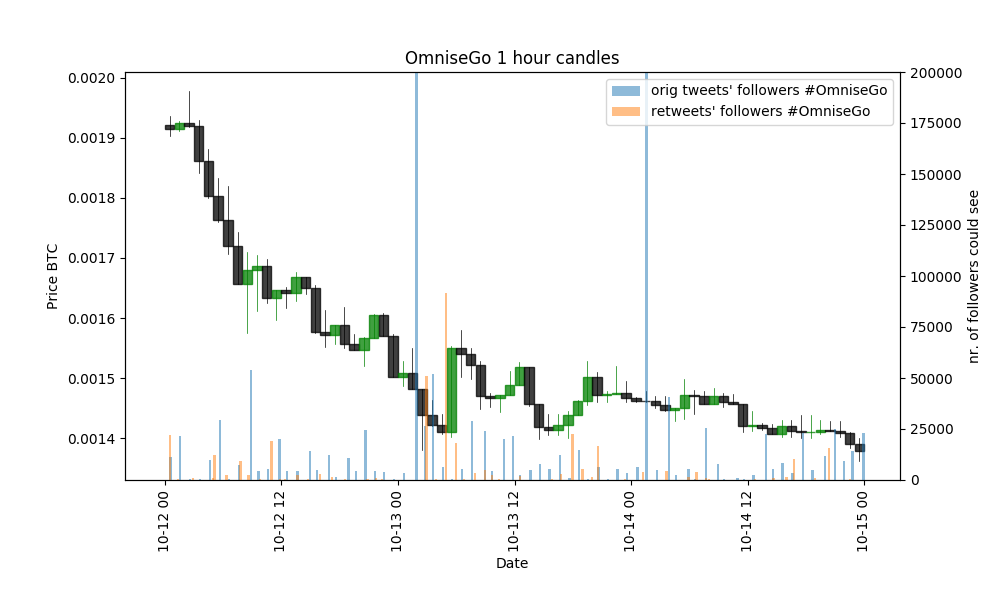

In [185]:

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt


df_ohlc= coin_price.copy()
#df_ohlc=df_ohlc.drop(['time1','volumefrom','volumeto'],axis=1)
fromperiod='2017-10-12'
toperiod='2017-10-15'
df_ohlc=df_ohlc[(df_ohlc['datetime'] >= fromperiod) & (df_ohlc['datetime'] < toperiod)]
gcoin_tweet_tmp=gtdf.copy()
gcoin_tweet_tmp=gcoin_tweet_tmp[(gcoin_tweet_tmp['max_datetime'] > fromperiod) & (gcoin_tweet_tmp['max_datetime'] < toperiod)]

grtdf_tmp=grtdf.copy()
grtdf_tmp=grtdf_tmp[(grtdf_tmp['max_datetime'] > fromperiod) & (grtdf_tmp['max_datetime'] < toperiod)]

#Reset the index to remove Date column from index
#df_ohlc = df_ohlc.reset_index()

#Naming columns
#df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

#Converting dates column to float values
df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.date2num)

#Making plot
fig = plt.figure(figsize=(10,6))
#ax1 = plt.subplot2grid((9,1), (0,0), rowspan=6, colspan=1)

ax1 = plt.subplot()

#Converts raw mdate numbers to dates
ax1.xaxis_date()
plt.xlabel("Date")
plt.ylabel("Price BTC")
#print(df_ohlc)

#Making candlestick plot
candlewidth=0.04
(lines, patches)=candlestick_ohlc(ax1,df_ohlc.values,width=candlewidth, colorup='g', colordown='k',alpha=0.75)
plt.xticks(rotation=90)


for pat in patches:
    pat.xy=(pat.xy[0]+candlewidth/2,pat.xy[1])
for line in lines:
    line.set_xdata((line.get_xdata()[0]+candlewidth/2,line.get_xdata()[1]+candlewidth/2))
    #pat.x=(pat.xy[0]+candlewidth/2,pat.xy[1])
    
ax2 = ax1.twinx()

#ax2.plot(coin_tweet_tmp['timestamp'],coin_tweet_tmp['score'], 'o',alpha=0.5)
ax2.bar(gcoin_tweet_tmp['max_datetime'], gcoin_tweet_tmp['follower_count'], width=0.01, align='center',alpha=0.5)
ax2.bar(grtdf_tmp['max_datetime'], grtdf_tmp['retweeter_followers'], width=0.01, align='center',alpha=0.5)

plt.ylim(ymax=200000)
plt.ylabel("nr. of followers could see")




plt.title("OmniseGo 1 hour candles")
plt.legend(['orig tweets\' followers #OmniseGo','retweets\' followers #OmniseGo'])

fig.subplots_adjust(bottom=0.2)
plt.show()





In [18]:
#df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.num2date)
df_ohlc.head()



,datetime,open,high,low,close
2089,736614.000000,0.001922,0.001937,0.001903,0.001915
2090,736614.041667,0.001915,0.001928,0.001911,0.001925
2091,736614.083333,0.001925,0.001979,0.001919,0.001920
2092,736614.125000,0.001920,0.001930,0.001841,0.001862
2093,736614.166667,0.001862,0.001881,0.001800,0.001803


In [12]:
#grtdf_tmp[grtdf_tmp['retweeter_followers']>10000]
gcoin_tweet_tmp[gcoin_tweet_tmp['follower_count']>10000]



follower_count        max_datetime  tweet_count
tstamp tstamp tstamp tstamp                                                 
2017   10     12     0                11417 2017-10-12 00:35:10            5
                     1                21548 2017-10-12 01:35:11            3
                     5                29643 2017-10-12 05:39:29            4
                     8                53827 2017-10-12 08:52:14            6
                     11               20033 2017-10-12 11:48:28            5
                     14               14169 2017-10-12 14:55:12            7
                     16               12036 2017-10-12 16:54:17            8
                     18               10575 2017-10-12 18:54:07            5
                     20               24609 2017-10-12 20:38:20            6
              13     1               233757 2017-10-13 01:53:30            7
                     2                26632 2017-10-13 02:44:32           10
                     3                52085 2017-10-13 03:35:10            6
                     7                29111 2017-10-13 07:35:10            4
                     8                23816 2017-10-13 08:55:21            5
                     10               20010 2017-10-13 10:54:07            6
                     11               21596 2017-10-13 11:50:41            5
                     16               12332 2017-10-13 16:38:24            5
                     18               14725 2017-10-13 18:36:40            8
              14     1               234953 2017-10-14 01:35:10            6
                     3                40491 2017-10-14 03:53:13            6
                     7                25250 2017-10-14 07:40:28            5
                     13               22471 2017-10-14 13:53:32            5
                     17               23241 2017-10-14 17:42:47            4
                     19               11714 2017-10-14 19:56:57            6
                     20               24930 2017-10-14 20:56:43            6
                     22               13984 2017-10-14 22:46:22            4
                     23               22958 2017-10-14 23:55:27            5

In [232]:

aimraise=8
declinelimit=-4
for o in range(12,13):
    print("at offset: ",o) 
    X=coin_price.copy()
    #X['datetime'] = X['datetime'].map(mdates.num2date)
    X['raise']=(X.close-X.open)/X.close*100
    X['cumraise']=0.0
    offset=o
    for i in X.index:
        isthereapointwhereaimraisereached=False
        isthereapointwheretrailingstopfires=False
        if i < len(X.index)-offset:
            sumraise=0.0
            startprice=X.at[i,'open']
            for j in range(offset):
                sumraise+=X.loc[i+j]['raise']
                if(sumraise>aimraise):
                    isthereapointwhereaimraisereached=True
                if(sumraise<declinelimit):
                    isthereapointwheretrailingstopfires=True
                    
            X.at[i,'cumraise']=sumraise
            if(isthereapointwhereaimraisereached==True  and isthereapointwheretrailingstopfires==False):
                X.at[i,'buysig']=1

        
    #X.at[X['cumraise']>=10,'buysig']=1
    X.set_index(['datetime'],inplace=True)
    print("buysig count",X['buysig'].count())



at offset:  12
buysig count 690


In [233]:
#coin_tweet
#coin_tweet.head()
#X.merge(coin_tweet,left_index=True,right_on='tstamp')

#
#gtdf.index+=1

def increase_by_one_hour(gtdf):
    #INCREASING HOUR BY 1
    X_gtdf=gtdf.copy()
    idx=X_gtdf.index
    X_gtdf.index=idx.set_names(['year', 'month','day','hour'])
    X_gtdf.reset_index(inplace=True)
    X_gtdf['hour']=X_gtdf['hour'].map(lambda x: x+1)
    X_gtdf.set_index(['year', 'month','day','hour'],inplace=True)
    return X_gtdf

X_gtdf=increase_by_one_hour(gtdf)
X_gtdf.head()

follower_count        max_datetime  tweet_count
year month day hour                                                 
2017 7     2   11             28416 2017-07-02 10:48:49            1
           3   10             31546 2017-07-03 09:17:05            2
               13             28416 2017-07-03 12:17:52            1
           5   16               368 2017-07-05 15:51:13            1
           6   2                156 2017-07-06 01:44:55            1

In [15]:

X_grtdf=increase_by_one_hour(grtdf)
X_grtdf.head()



retweeter_followers        max_datetime  retweet_count
year month day hour                                                        
2017 7     2   11                   1671 2017-07-02 10:49:07              1
               17                    230 2017-07-02 16:49:11              1
           3   10                 232544 2017-07-03 09:12:23              2
               11                     13 2017-07-03 10:03:33              1
               13                   1035 2017-07-03 12:41:00              2

In [224]:

X.head()
times = pd.DatetimeIndex(X.index)

gX=X.groupby([times.year, times.month, times.day,times.hour]).open.sum()
gXdf=pd.DataFrame(gX)
gXdf['buysig']=X.groupby([times.year, times.month, times.day,times.hour])['buysig'].max()
idx=gXdf.index
gXdf.index=idx.set_names(['year', 'month','day','hour'])
gXdf.head()

#MERGE:
gXdf=gXdf.merge(X_grtdf,how='left',left_index=True,right_index=True)
Xdf=gXdf.merge(X_gtdf,how='left',left_index=True,right_index=True)

#gt=coin_tweet.groupby([times.year, times.month, times.day,times.hour]).follower_count.sum()
#gtdf=pd.DataFrame(gt)
#gtdf['max_datetime']=coin_tweet.groupby([times.year, times.month, times.day,times.hour]).tstamp.max()
#gtdf['tweet_count']=coin_tweet.groupby([times.year, times.month, times.day,times.hour]).follower_count.count()
#gtdf.head()

Xdf.head()


open  buysig  retweeter_followers max_datetime_x  \
year month day hour                                                         
2017 7     16  23    0.000202     1.0                  NaN            NaT   
           17  0     0.000201     1.0                  NaN            NaT   
               1     0.000214     1.0                  NaN            NaT   
               2     0.000220     1.0                  NaN            NaT   
               3     0.000265     NaN                  NaN            NaT   

                     retweet_count  follower_count max_datetime_y  tweet_count  
year month day hour                                                             
2017 7     16  23              NaN             NaN            NaT          NaN  
           17  0               NaN             NaN            NaT          NaN  
               1               NaN             NaN            NaT          NaN  
               2               NaN             NaN            NaT          NaN  
               3               NaN             NaN            NaT          NaN

In [225]:
print("tweet count",len(X_gtdf))
print("retweet count",len(X_grtdf))
print("price data count",len(gXdf))

print("buysig count: ",len(gXdf[gXdf['buysig']>0]))


tweet count 3571
retweet count 2718
price data count 4652
buysig count:  277


In [226]:


possible_follovers=list([200,500,1000,2000,3000,4000,5000,8000,10000,15000,20000,30000,50000,75000,100000,150000,200000,400000])
for i in possible_follovers:
    min_followers=i
    rowcount=Xdf[(Xdf['retweeter_followers']>min_followers) | (Xdf['follower_count']>min_followers)]['open'].count()
    buysigcount=Xdf[(Xdf['retweeter_followers']>min_followers) | (Xdf['follower_count']>min_followers)]['buysig'].count()
    print(i," follower results ratio: ",buysigcount/rowcount)

#Xdf.head()
#Xdf[(Xdf['retweeter_followers']>min_followers) | (Xdf['follower_count']>min_followers)]


200  follower results ratio:  0.0504297994269341
500  follower results ratio:  0.04834905660377359
1000  follower results ratio:  0.047748976807639835
2000  follower results ratio:  0.04448742746615087
3000  follower results ratio:  0.04390681003584229
4000  follower results ratio:  0.04496124031007752
5000  follower results ratio:  0.04973037747153984
8000  follower results ratio:  0.05412156536219817
10000  follower results ratio:  0.05950095969289827
15000  follower results ratio:  0.06302021403091558
20000  follower results ratio:  0.05555555555555555
30000  follower results ratio:  0.06779661016949153
50000  follower results ratio:  0.0782122905027933
75000  follower results ratio:  0.08653846153846154
100000  follower results ratio:  0.09803921568627451
150000  follower results ratio:  0.1282051282051282
200000  follower results ratio:  0.13513513513513514
400000  follower results ratio:  0.0


In [227]:

pd.options.display.max_rows = 999
pd.options.display.max_columns = 19

Xdf


open  buysig  retweeter_followers  \
year month day hour                                          
2017 7     16  23    0.000202     1.0                  NaN   
           17  0     0.000201     1.0                  NaN   
               1     0.000214     1.0                  NaN   
               2     0.000220     1.0                  NaN   
               3     0.000265     NaN                  NaN   
               4     0.000263     NaN                  NaN   
               5     0.000269     NaN                  NaN   
               6     0.000259     NaN                  NaN   
               7     0.000261     NaN                  NaN   
               8     0.000257     NaN                  NaN   
               9     0.000269     NaN                  NaN   
               10    0.000257     NaN                  NaN   
               11    0.000253     NaN                  NaN   
               12    0.000236     NaN                  NaN   
               13    0.000234     NaN                  NaN   
               14    0.000237     NaN                  NaN   
               15    0.000258     NaN                  NaN   
               16    0.000270     NaN                  NaN   
               17    0.000266     NaN                  NaN   
               18    0.000270     NaN                  NaN   
               19    0.000264     1.0                  NaN   
               20    0.000265     1.0                  NaN   
               21    0.000269     1.0                  NaN   
               22    0.000269     1.0                  NaN   
               23    0.000268     1.0                  NaN   
           18  0     0.000263     1.0                  NaN   
               1     0.000267     1.0                  NaN   
               2     0.000272     1.0                  NaN   
               3     0.000273     1.0                  NaN   
               4     0.000285     1.0                  NaN   
               5     0.000305     1.0                  NaN   
               6     0.000307     1.0                  NaN   
               7     0.000324     NaN                  8.0   
               8     0.000360     NaN                  NaN   
               9     0.000331     NaN                  NaN   
               10    0.000327     NaN               8622.0   
               11    0.000318     1.0                  NaN   
               12    0.000305     1.0                  NaN   
               13    0.000331     NaN                127.0   
               14    0.000339     NaN                  NaN   
               15    0.000379     NaN                  NaN   
               16    0.000360     NaN                  NaN   
               17    0.000346     NaN                  NaN   
               18    0.000350     NaN                  NaN   
               19    0.000366     NaN                  NaN   
               20    0.000344     NaN                  NaN   
               21    0.000328     NaN                  NaN   
               22    0.000325     NaN                  NaN   
               23    0.000317     NaN                  NaN   
           19  0     0.000333     NaN                  NaN   
               1     0.000356     NaN                  NaN   
               2     0.000331     NaN                  NaN   
               3     0.000337     NaN                  NaN   
               4     0.000315     NaN                  NaN   
               5     0.000312     NaN                  NaN   
               6     0.000316     NaN                  NaN   
               7     0.000317     NaN                  NaN   
               8     0.000318     NaN                  NaN   
               9     0.000304     NaN                  NaN   
               10    0.000310     NaN                  NaN   
               11    0.000299     NaN                  NaN   
               12    0.000301     NaN                  NaN   
               13    0.000278     NaN                  Na

In [228]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
import keras.backend as K




In [229]:

data=Xdf.copy()
data.reset_index(inplace=True)
data.fillna(0,inplace=True)

for i in data.index:
    if(i>0):
        data.at[i,'follower_count']=round(data.at[i,'follower_count']+data.at[i-1,'follower_count']/2)
        data.at[i,'retweeter_followers']=round(data.at[i,'retweeter_followers']+data.at[i-1,'retweeter_followers']/2)


data

,year,month,day,hour,open,buysig,retweeter_followers,max_datetime_x,retweet_count,follower_count,max_datetime_y,tweet_count
0,2017,7,16,23,0.000202,1.0,0.0,0,0.0,0.0,0,0.0
1,2017,7,17,0,0.000201,1.0,0.0,0,0.0,0.0,0,0.0
2,2017,7,17,1,0.000214,1.0,0.0,0,0.0,0.0,0,0.0
3,2017,7,17,2,0.000220,1.0,0.0,0,0.0,0.0,0,0.0
4,2017,7,17,3,0.000265,0.0,0.0,0,0.0,0.0,0,0.0
5,2017,7,17,4,0.000263,0.0,0.0,0,0.0,0.0,0,0.0
6,2017,7,17,5,0.000269,0.0,0.0,0,0.0,0.0,0,0.0
7,2017,7,17,6,0.000259,0.0,0.0,0,0.0,0.0,0,0.0
8,2017,7,17,7,0.000261,0.0,0.0,0,0.0,0.0,0,0.0
9,2017,7,17,8,0.000257,0.0,0.0,0,0.0,0.0,0,0.0


In [230]:
from sklearn import preprocessing


data=Xdf.copy()
data.reset_index(inplace=True)
data['buysig'].fillna(0,inplace=True)
labels = data.pop('buysig')
data.drop(columns=['year','month','day','max_datetime_x','max_datetime_y'], inplace=True)

#data.fillna(method='ffill',inplace=True)
data.fillna(0,inplace=True)

for i in data.index:
    if(i>0):
        data.at[i,'follower_count']=round(data.at[i,'follower_count']+data.at[i-1,'follower_count']/2)
        data.at[i,'retweeter_followers']=round(data.at[i,'retweeter_followers']+data.at[i-1,'retweeter_followers']/2)


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
data



,0,1,2,3,4,5
0,1.000000,0.000315,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.043478,0.004547,0.000000,0.000000,0.000000,0.000000
3,0.086957,0.006611,0.000000,0.000000,0.000000,0.000000
4,0.130435,0.022211,0.000000,0.000000,0.000000,0.000000
5,0.173913,0.021617,0.000000,0.000000,0.000000,0.000000
6,0.217391,0.023576,0.000000,0.000000,0.000000,0.000000
7,0.260870,0.020148,0.000000,0.000000,0.000000,0.000000
8,0.304348,0.020987,0.000000,0.000000,0.000000,0.000000
9,0.347826,0.019483,0.000000,0.000000,0.000000,0.000000


In [231]:
# For a single-input model with 2 classes (binary classification):

def precision(y_true, y_pred):
    threshold=0.25
    mult=0.5/threshold
    true_positives = K.sum(K.round(K.clip(y_true * y_pred*mult, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred*mult, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    threshold=0.25
    mult=0.5/threshold
    true_positives = K.sum(K.round(K.clip(y_true * y_pred*mult, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
    
featuresize=len(data.columns)
model = Sequential()
model.add(Dense(120, activation='relu', input_dim=featuresize))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=[precision,recall,'accuracy'])

#model.compile(loss='categorical_crossentropy',
#              optimizer='adadelta',
#              metrics=['accuracy', 'f1score', 'precision', 'recall'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)



Epoch 1/10
4652/4652 [==============================] - 4s 920us/step - loss: 0.2352 - precision: 0.0085 - recall: 0.0407 - acc: 0.9405
Epoch 2/10
4652/4652 [==============================] - 0s 91us/step - loss: 0.2145 - precision: 0.0000e+00 - recall: 0.0000e+00 - acc: 0.9405
Epoch 3/10
4652/4652 [==============================] - 0s 93us/step - loss: 0.2126 - precision: 0.0034 - recall: 0.0069 - acc: 0.9405 
Epoch 4/10
4652/4652 [==============================] - 0s 92us/step - loss: 0.2136 - precision: 0.0000e+00 - recall: 0.0000e+00 - acc: 0.9405
Epoch 5/10
4652/4652 [==============================] - 0s 90us/step - loss: 0.2107 - precision: 0.0069 - recall: 0.0023 - acc: 0.9405 
Epoch 6/10
4652/4652 [==============================] - 0s 89us/step - loss: 0.2118 - precision: 0.0034 - recall: 0.0023 - acc: 0.9405
Epoch 7/10
4652/4652 [==============================] - 0s 98us/step - loss: 0.2114 - precision: 0.0000e+00 - recall: 0.0000e+00 - acc: 0.9405
Epoch 8/10
4652/4652 [======

In [222]:
print(len(data))
print(len(model.predict(data)))
pred=model.predict(data)
result=data.copy()
result['label']=labels
result['pred']=pred
result[result['pred']>0.25]



4652
4652


,0,1,2,3,4,5,label,pred
0,1.000000,0.000315,0.000000,0.000000,0.000000,0.000000,1.0,0.471516
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.389497
2,0.043478,0.004547,0.000000,0.000000,0.000000,0.000000,1.0,0.376033
3,0.086957,0.006611,0.000000,0.000000,0.000000,0.000000,1.0,0.360720
4,0.130435,0.022211,0.000000,0.000000,0.000000,0.000000,0.0,0.330047
5,0.173913,0.021617,0.000000,0.000000,0.000000,0.000000,0.0,0.317945
6,0.217391,0.023576,0.000000,0.000000,0.000000,0.000000,0.0,0.306413
7,0.260870,0.020148,0.000000,0.000000,0.000000,0.000000,0.0,0.304051
8,0.304348,0.020987,0.000000,0.000000,0.000000,0.000000,0.0,0.305836
9,0.347826,0.019483,0.000000,0.000000,0.000000,0.000000,0.0,0.320064


In [203]:
from keras.layers import Dense, Dropout


splitpoint=int(len(data)*0.6)
print("splitpoint: ",splitpoint)
training_data = data[:splitpoint]
eval_data = data[splitpoint:]

training_label = labels[:splitpoint]
eval_label = labels[splitpoint:]

##MLP for binary classification:

model = Sequential()
model.add(Dense(128, input_dim=featuresize, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=[precision,recall,'accuracy'])

model.fit(training_data, training_label,
          epochs=20,
          batch_size=128)
score = model.evaluate(eval_data, eval_label, batch_size=128)
score

splitpoint:  2791
Epoch 1/20
2791/2791 [==============================] - 2s 842us/step - loss: 0.4347 - precision: 0.1577 - recall: 0.5694 - acc: 0.8578
Epoch 2/20
2791/2791 [==============================] - 0s 34us/step - loss: 0.3699 - precision: 0.2101 - recall: 0.3632 - acc: 0.8732
Epoch 3/20
2791/2791 [==============================] - 0s 35us/step - loss: 0.3644 - precision: 0.2372 - recall: 0.4391 - acc: 0.8732
Epoch 4/20
2791/2791 [==============================] - 0s 31us/step - loss: 0.3615 - precision: 0.2521 - recall: 0.4339 - acc: 0.8732
Epoch 5/20
2791/2791 [==============================] - 0s 32us/step - loss: 0.3639 - precision: 0.2319 - recall: 0.4562 - acc: 0.8732
Epoch 6/20
2791/2791 [==============================] - 0s 32us/step - loss: 0.3698 - precision: 0.2458 - recall: 0.4685 - acc: 0.8732
Epoch 7/20
2791/2791 [==============================] - 0s 31us/step - loss: 0.3598 - precision: 0.2387 - recall: 0.4609 - acc: 0.8732
Epoch 8/20
2791/2791 [==============

[0.32993699488525813,
 0.1112362618474535,
 0.3920039638660724,
 0.908651262761956]

In [200]:
pred=model.predict(eval_data)
result=eval_data.copy()
result['label']=eval_label
result['pred']=pred
for thresh in range(10,50):
    p=result[result['pred']>thresh/100]
    prec=p['label'].sum()/len(p)
    print("thresh:",thresh/100,'  precision:',prec)

p=result[result['pred']>0.3]


thresh:  0.1  precision 0.09446254071661238
thresh:  0.11  precision 0.09615384615384616
thresh:  0.12  precision 0.09852941176470588
thresh:  0.13  precision 0.10284810126582279
thresh:  0.14  precision 0.10398613518197573
thresh:  0.15  precision 0.10673076923076923
thresh:  0.16  precision 0.11182795698924732
thresh:  0.17  precision 0.11403508771929824
thresh:  0.18  precision 0.12556053811659193
thresh:  0.19  precision 0.13043478260869565
thresh:  0.2  precision 0.1447661469933185
thresh:  0.21  precision 0.16012084592145015
thresh:  0.22  precision 0.17100371747211895
thresh:  0.23  precision 0.18614718614718614
thresh:  0.24  precision 0.21195652173913043
thresh:  0.25  precision 0.22666666666666666
thresh:  0.26  precision 0.22580645161290322
thresh:  0.27  precision 0.24509803921568626
thresh:  0.28  precision 0.26436781609195403
thresh:  0.29  precision 0.29411764705882354
thresh:  0.3  precision 0.2857142857142857
thresh:  0.31  precision 0.2826086956521739
thresh:  0.32  p

/Users/tothmiklos/develop/venv-python35/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [218]:
### LTSM multi

data_dim = featuresize
timesteps = 8
num_classes = 2

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(Embedding(featuresize, output_dim=256))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[precision,recall,'accuracy'])

# Generate dummy training data
x_train = training_data
y_train = training_label

# Generate dummy validation data
x_val = eval_data
y_val = eval_label
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
model.fit(x_train, y_train,
          batch_size=32, epochs=5,
          validation_data=(x_val, y_val))





(2791, 6)
(2791,)
(1861, 6)
(1861,)
Train on 2791 samples, validate on 1861 samples
Epoch 1/5
2791/2791 [==============================] - 9s 3ms/step - loss: 0.4122 - precision: 0.0327 - recall: 0.1594 - acc: 0.8692 - val_loss: 0.3205 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.9087
Epoch 2/5
2791/2791 [==============================] - 2s 595us/step - loss: 0.3833 - precision: 0.0000e+00 - recall: 0.0000e+00 - acc: 0.8732 - val_loss: 0.3150 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.9087
Epoch 3/5
2791/2791 [==============================] - 2s 610us/step - loss: 0.3839 - precision: 0.0182 - recall: 0.0103 - acc: 0.8732 - val_loss: 0.3130 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.9087
Epoch 4/5
2791/2791 [==============================] - 2s 605us/step - loss: 0.3834 - precision: 0.0057 - recall: 0.0057 - acc: 0.8732 - val_loss: 0.3085 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_acc: 0.9087
Epoch 5/5


In [19]:


ctw=coin_tweet_tmp[coin_tweet_tmp['score']>700]
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 300)
(ctw[['timestamp','text','score']])



,timestamp,text,score
11204,2017-09-08 12:28:47,Appreciate awesome explanation of #OmiseGO @VitalikButerin !! Your advice is always great ! #plasmahttps://youtu.be/5lt2_Q1Q2MU,18860
11073,2017-09-09 07:02:35,Is #OMISEGO interesting?\nhttps://briandcolwell.com/2017/08/omisego-unbanking-the-banked-with-ethereum-gamification/.html … @omise_go #blockchain #cryptocurrencies #IoT #crypto #cryptocurrency #fintech #ethereum,770
11023,2017-09-09 13:34:44,In 3 months people will look back at this time and say. I should have bought. $omg The strongest performing coin. #OmiseGo #omisepic.twitter.com/MfYQF5IxOu,1680
11016,2017-09-09 14:00:17,Good news for #OmiseGo holders. Binance will list #OMG in 3 days. Retweet if you have #OMG in your bag. https://binance.zendesk.com/hc/en-us/articles/115001495491 …pic.twitter.com/XPmJUq6Hu1,16930
10984,2017-09-09 17:23:54,$OMG was the first #ERC20 token \n\nThe gains thus far will be nothing by month's end. \n #OmiseGo $BNB #Binancehttps://twitter.com/binance_2017/status/906501829046919168 …,1640
10974,2017-09-09 19:21:50,Someone told me #vitalik owns more #OMG tokens than his own #ETH. He is more involved than we think and he definitely thrusts #OmiseGo,900
10958,2017-09-09 21:48:49,My OmiseGO giveaway is still running!\n\n#omg #omise #omisego #giveaway #bitcoin #ethereum $OMG $BTC $ETH $crypto $LSK $XMR $LTC $NEO $ETChttps://twitter.com/cointrackr/status/905512029494095872 …,1850
10941,2017-09-09 23:57:25,#OMISEGO enables realtime #p2p #payments\nhttps://briandcolwell.com/2017/08/omisego-unbanking-the-banked-with-ethereum-gamification/.html … @omise_go #blockchain #cryptocurrencies #crypto #fintech #capital,2730
10882,2017-09-10 14:28:28,"Binance will add OMG/BTC, OMG/ETH trading pairs on Binance exchange on 2017/09/12 12:00 (Beijing Time). $OMG $ETH $BTC #OmiseGO CU@ $15+ pic.twitter.com/cDgqRQUkPv",21990
10845,2017-09-10 20:32:02,"Understanding $OMG: \n#OmiseGo One of the seven subsidiaries of @Omise Holdings, plans to launch..{r/m} - https://coinreviews.io/omisego-token-review …\n#CryptoNewspic.twitter.com/d6VmZ1lWrm",730


In [16]:
from datetime import timedelta

coin_price['Change %']=(coin_price['Close']-coin_price['Open'])/coin_price['Open']
coin_price['Previous Date']=coin_price['Date']- timedelta(days=1)
coin_price['Previous Date']= coin_price['Previous Date'].dt.date

coin_tweet['Date'] = coin_tweet['tstamp'].dt.date



coin_merged=pd.merge(coin_price, coin_tweet, how='inner', left_on='Previous Date', right_on='Date')
coin_merged['score_mul_next_day_chg']=coin_merged['score']*coin_merged['Change %']
coin_merged['direction']=np.where(coin_merged['score_mul_next_day_chg'] > 0, 1, 0)
coin_merged.head()



KeyError: 'Close'

In [137]:
coin_price.head()

,datetime,open,high,low,close
0,2017-07-16 23:00:00,0.000202,0.000217,0.000201,0.000201
1,2017-07-17 00:00:00,0.000201,0.000220,0.000201,0.000214
2,2017-07-17 01:00:00,0.000214,0.000229,0.000202,0.000220
3,2017-07-17 02:00:00,0.000220,0.000280,0.000220,0.000265
4,2017-07-17 03:00:00,0.000265,0.000330,0.000250,0.000263


<IPython.core.display.Javascript object>


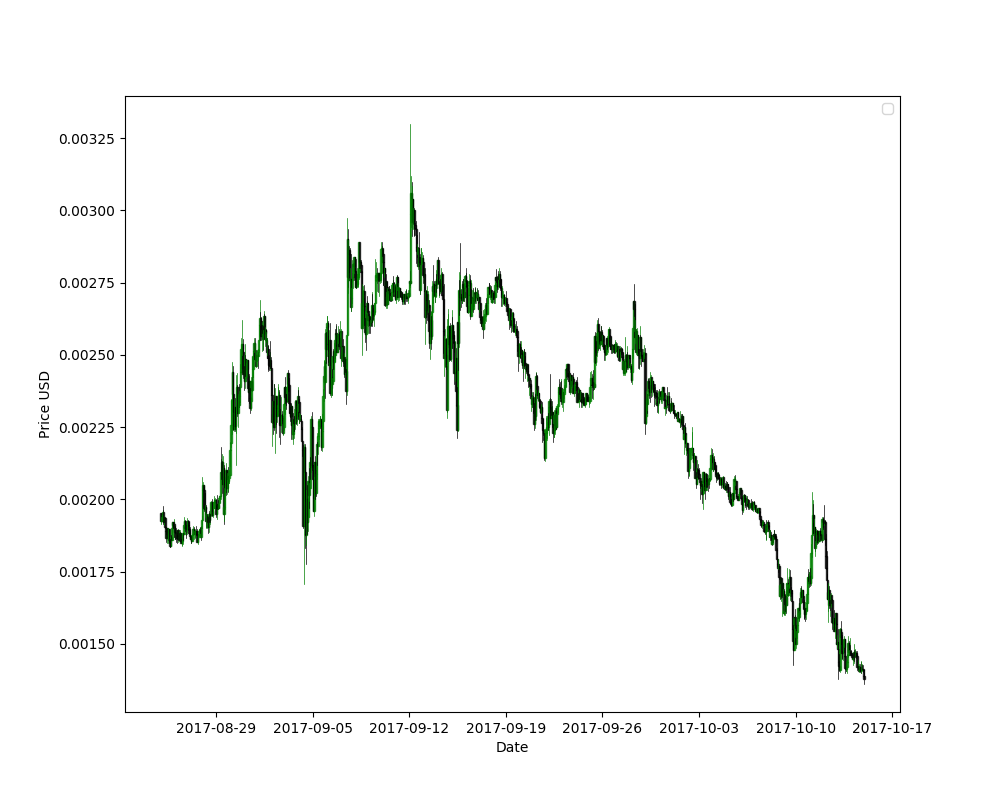

No handles with labels found to put in legend.


In [151]:


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt


df_ohlc=coin_price.copy()
#df_ohlc=df_ohlc.drop(['datetime'],axis=1)
#Reset the index to remove Date column from index
#df_ohlc = df_ohlc.reset_index()

#Naming columns
#df_ohlc.columns = ["Date","Open","High",'Low',"Close"]


fromperiod='2017-08-25'
toperiod='2017-10-15'
df_ohlc=df_ohlc[(df_ohlc['datetime'] >= fromperiod) & (df_ohlc['datetime'] < toperiod)]


#Converting dates column to float values
df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.date2num)

#Making plot
fig = plt.figure(figsize=(10,8))
#ax1 = plt.subplot2grid((9,1), (0,0), rowspan=6, colspan=1)

ax1 = plt.subplot()

#Converts raw mdate numbers to dates
ax1.xaxis_date()
plt.xlabel("Date")
#print(df_ohlc)

#Making candlestick plot
candlestick_ohlc(ax1,df_ohlc.values,width=0.1, colorup='g', colordown='k',alpha=0.75)

#ax2 = ax1.twinx()

#ax2.plot(coin_merged['timestamp'],coin_merged['score_mul_next_day_chg'], 'b',alpha=0.5)



plt.ylabel("Price USD")
plt.legend()

#plt.show()

#print(df_ohlc)




In [84]:
#coin_merged['text']
#coin_merged['score_mul_next_day_chg'].mean()
from sklearn.model_selection import train_test_split

#df[['A', 'B']]
X=coin_merged[['text','score']]
X_train, X_test, y_train, y_test = train_test_split(X['text'], 
                                                    coin_merged['direction'], 
                                                    random_state=0)


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X['score'], 
                                                    coin_merged['direction'], 
                                                    random_state=0)

from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=10, ngram_range=(1,1)).fit(X_train)
print((X_train.shape))
print((X_train_s.shape))


(11822,)
(11822,)


In [85]:
len(vect.get_feature_names())

1485

In [86]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized.shape

(11822, 1485)

In [87]:
#import scipy.sparse
def pointmult(a,b):
    x = a.copy()
    for i in range(a.shape[0]):
        if x.data[i]:
            for j in range(a.shape[1]):
                x.data[i][j] *= b.iloc[j]
    return x

#X_train_vectorized=pointmult(X_train_vectorized, X_train_s)
#X_train_vectorized=X_train_vectorized.multiply(X_train_s)
#X_train_vectorized.shape
#X_train_vectorized['score']=X_train_s

print(X_train_vectorized.shape)
print(X_train_s.shape)
#type(X_train_vectorized)


(11822, 1485)
(11822,)


In [88]:
print(X_train_vectorized)

  (0, 91)	1
  (0, 100)	1
  (0, 199)	1
  (0, 264)	3
  (0, 423)	1
  (0, 525)	1
  (0, 952)	1
  (0, 998)	1
  (0, 1013)	1
  (0, 1122)	1
  (1, 56)	1
  (1, 336)	1
  (1, 359)	1
  (1, 424)	1
  (1, 615)	1
  (1, 663)	1
  (1, 698)	1
  (1, 716)	1
  (1, 748)	1
  (1, 804)	1
  (1, 866)	1
  (1, 944)	2
  (1, 952)	2
  (1, 974)	1
  (1, 1038)	1
  :	:
  (11820, 748)	1
  (11820, 804)	1
  (11820, 866)	1
  (11820, 944)	2
  (11820, 952)	2
  (11820, 974)	1
  (11820, 1038)	1
  (11820, 1359)	2
  (11821, 27)	1
  (11821, 56)	1
  (11821, 336)	1
  (11821, 424)	1
  (11821, 615)	1
  (11821, 663)	1
  (11821, 698)	1
  (11821, 716)	1
  (11821, 720)	1
  (11821, 748)	1
  (11821, 804)	1
  (11821, 866)	1
  (11821, 944)	2
  (11821, 952)	2
  (11821, 974)	1
  (11821, 1038)	1
  (11821, 1359)	2


In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Train the model
#model = LogisticRegression()
#model.fit(X_train_vectorized, y_train)

#model = LogisticRegression()
#model.fit([X_train_s], y_train)

#reg=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 50,5), random_state=1)
#reg.fit(X_train_vectorized, y_train) 

clf = svm.SVC()
clf.fit(X_train_vectorized, y_train) 

#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 50,2), random_state=1)
#clf.fit(X_train_s, y_train_s) 
#model = clf


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
from sklearn.metrics import r2_score

predictions = reg.predict(vect.transform(X_test))
r2_score(y_test, predictions)


-0.2821854788537814

In [44]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = clf.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5


In [236]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-31:-1]]))

Smallest Coefs:
['omisego 17' '17' '24' '100' 'omisego 24' 'poloniex' 'omisego 23' 'seems'
 'blockchain bitcoin' 'buy bitcoin']

Largest Coefs: 
['omisego 13' 'omisego 14' 'bcolwell_alt omisego includes' '26' 'waiting'
 'to get' '13' 'earn' 'in bitcoin' '60' 'increased by 0257' 'usd 24 omg'
 '90' 'btc bitcoin' 'changed by 0158' 'performance assessment 80'
 'assessment 80' 'usd 15 omg' '0227' '0227 usd' 'changed by 0129'
 'about omisego' '36' 'increased by 0082' '1941' '1941 usd' 'track' '39'
 '06' 'omisego https youtu']
